In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train=pd.read_csv(r"C:\Users\madhu\Downloads\train_yaOffsB.csv")
df_test=pd.read_csv(r"C:\Users\madhu\Downloads\test_pFkWwen.csv")

# Column Name → Description
Id UniqueID

Estimated_Insects_Count → Estimated insects count per square meter

Crop_Type → Category of Crop(0,1)

Soil_Type → Category of Soil (0,1)

Pesticide_Use_Category → Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using)

Number_Doses_Week →Number of doses per week

Number_Weeks_Used → Number of weeks used

Number_Weeks_Quit → Number of weeks quit

Season → Season Category (1,2,3)

Crop_Damage →Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)

In [3]:
df_train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
#check the shape of df_train
df_train.shape

(88858, 10)

Here we have 59310 rows and 9 columns

In [5]:
#check the dtypes
df_train.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [6]:
df_test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In df_train we have two  data types object and numeric

In [7]:
#check shape of df_test
df_test.shape

(59310, 9)

here we have 88858 rows and 10 columns

In [8]:
#check the data types 
df_test.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

it have object and numeric two data types

In [9]:
df_agr=pd.concat([df_train,df_test],sort=False)
df_agr

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0.0
1,F00000003,209,1,0,1,0,0.0,0,2,1.0
2,F00000004,257,1,0,1,0,0.0,0,2,1.0
3,F00000005,257,1,1,1,0,0.0,0,2,1.0
4,F00000006,342,1,0,1,0,0.0,0,2,1.0
...,...,...,...,...,...,...,...,...,...,...
59305,F00155937,3337,1,0,2,20,34.0,12,1,NaN
59306,F00155940,3516,1,0,2,20,32.0,10,2,NaN
59307,F00155941,3702,1,0,2,10,NaN,48,1,NaN
59308,F00155943,3702,1,0,2,10,28.0,17,2,NaN


In [10]:
df_agr.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                float64
dtype: object

In [11]:
df_agr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148168 entries, 0 to 59309
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       148168 non-null  object 
 1   Estimated_Insects_Count  148168 non-null  int64  
 2   Crop_Type                148168 non-null  int64  
 3   Soil_Type                148168 non-null  int64  
 4   Pesticide_Use_Category   148168 non-null  int64  
 5   Number_Doses_Week        148168 non-null  int64  
 6   Number_Weeks_Used        133275 non-null  float64
 7   Number_Weeks_Quit        148168 non-null  int64  
 8   Season                   148168 non-null  int64  
 9   Crop_Damage              88858 non-null   float64
dtypes: float64(2), int64(7), object(1)
memory usage: 12.4+ MB


In [12]:
df_agr.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [13]:
df_agr["Crop_Damage"]=df_agr["Crop_Damage"].replace({0.0:"Alive",1.0:"Other Cause",2.0:"Pesticides"})
df_agr["Crop_Damage"].value_counts()

Alive          74238
Other Cause    12307
Pesticides      2313
Name: Crop_Damage, dtype: int64

Observation:-  Here we observe that 74238 crop alive ,12307 are damaged by other cause and 2313 are damaged due to pesticides

In [14]:
df_agr.isnull().sum()

ID                             0
Estimated_Insects_Count        0
Crop_Type                      0
Soil_Type                      0
Pesticide_Use_Category         0
Number_Doses_Week              0
Number_Weeks_Used          14893
Number_Weeks_Quit              0
Season                         0
Crop_Damage                59310
dtype: int64

In NUmber_weeks_used and crop_damage lot of null value present

<Axes: >

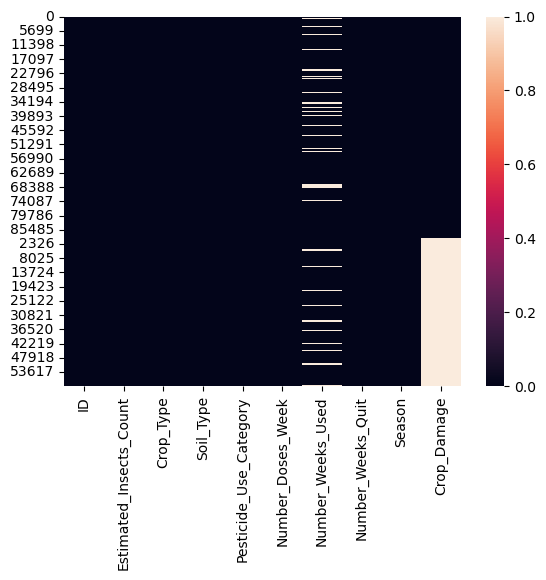

In [15]:
#heatmap for showing null value
sns.heatmap(df_agr.isnull())

    In above  null values clearly visible by differenet colour bar

In [16]:
#filling null value
col_to_impute=["Number_Weeks_Used","Crop_Damage"]
for col in col_to_impute:
    if df_agr[col].dtypes!="object":
        df_agr[col].fillna(df_agr[col].mean(),inplace=True)
    else:
        df_agr[col].fillna(df_agr[col].mode()[0],inplace=True)

<Axes: >

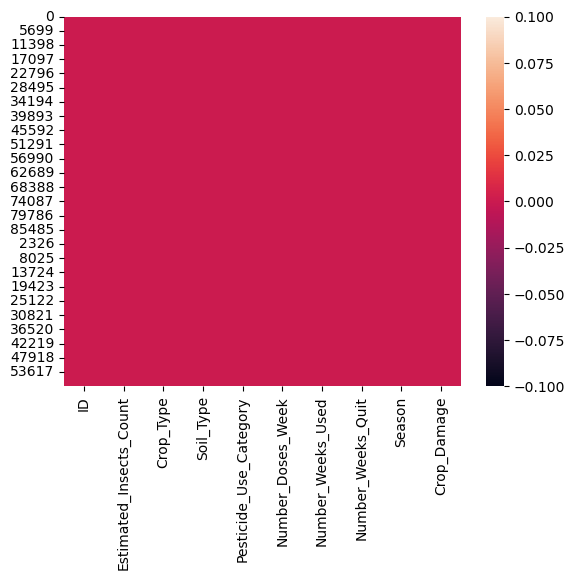

In [17]:
sns.heatmap(df_agr.isnull())

In [18]:
df_agr.isnull().values.any()

False

# Statistics analysis

In [19]:
df_agr.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,148168.000000,148168.000000,148168.000000,148168.000000,148168.000000,148168.000000,148168.000000,148168.000000
mean,1398.212401,0.285453,0.457096,2.263802,25.850724,28.656485,9.565324,1.898527
std,849.197419,0.451631,0.498158,0.461755,15.525407,11.763780,9.882540,0.701568
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.656485,7.000000,2.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000


Observation

In above we observe that Estimated_insects_count has highest std .and Estimated_insects_count,number_doses_week,number_weeks_used,number_weeks_quit they all have outliers


# correlation

In [20]:
cor=df_agr.corr()
cor

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
Estimated_Insects_Count,1.000000,-0.090363,-0.056379,-0.082212,-0.102897,0.413700,0.299628,-0.001141
Crop_Type,-0.090363,1.000000,-0.289331,0.234132,-0.191225,-0.041950,-0.234154,0.002445
Soil_Type,-0.056379,-0.289331,1.000000,0.034108,0.079209,-0.064926,0.009091,0.000163
Pesticide_Use_Category,-0.082212,0.234132,0.034108,1.000000,-0.000223,0.326650,-0.552969,-0.000078
Number_Doses_Week,-0.102897,-0.191225,0.079209,-0.000223,1.000000,0.120231,-0.038623,-0.000210
Number_Weeks_Used,0.413700,-0.041950,-0.064926,0.326650,0.120231,1.000000,-0.424582,0.001249
Number_Weeks_Quit,0.299628,-0.234154,0.009091,-0.552969,-0.038623,-0.424582,1.000000,0.001636
Season,-0.001141,0.002445,0.000163,-0.000078,-0.000210,0.001249,0.001636,1.000000


<Axes: >

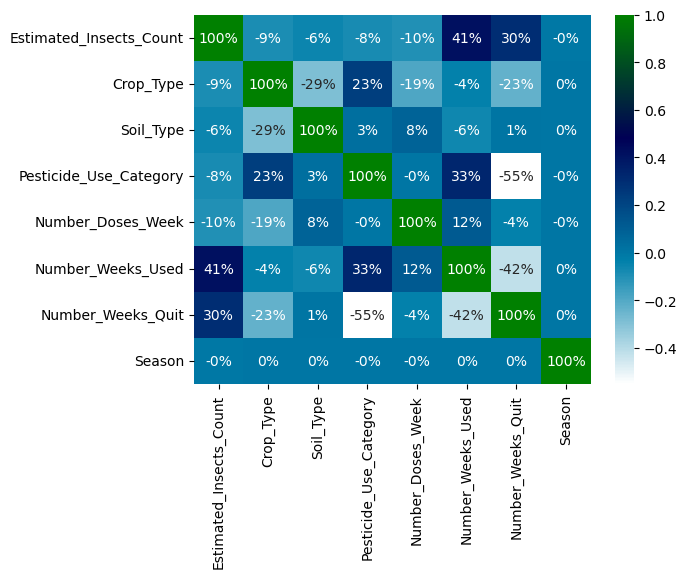

In [21]:
#plot heatmap for better visualization

sns.heatmap(cor,annot=True,fmt=".0%",cmap="ocean_r")

Observation :-

we can see Number_weeks_used , Estimated_insects_count ,Number_weeks_quit,pesticide_used_category are highily correlated and season has no correlation with other  

In [22]:
df_agr.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                 object
dtype: object

# Outliers

In [23]:
#for finding outliers we can plot boxplot 

# for i in df_agr.columns[:2]:
#     if df_agr[i].dtypes!="object":
#         sns.boxplot(df_agr[i])
#         plt.show()

<Axes: >

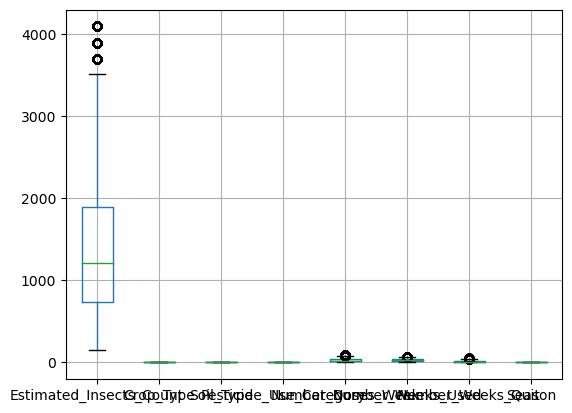

In [24]:
df_agr.boxplot()

In estimated_insects_count has more outliers 

# Estimated_insects_count

<Axes: xlabel='Estimated_Insects_Count'>

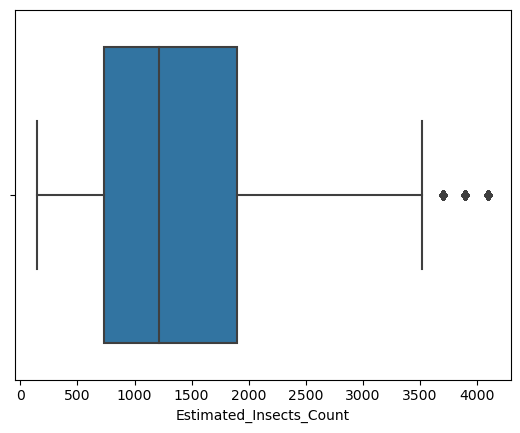

In [25]:
sns.boxplot(data=df_agr,x="Estimated_Insects_Count")

Here after 3500 we have outliers 

# Crop_type

<Axes: xlabel='Crop_Type'>

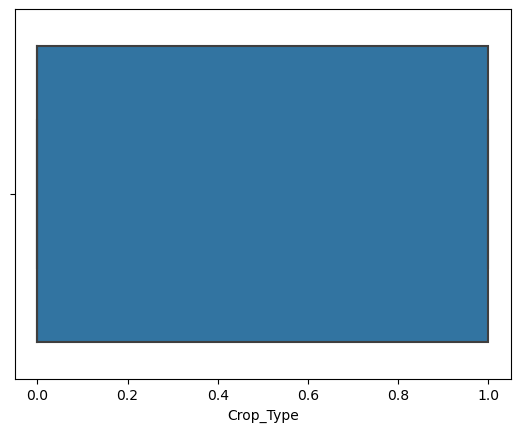

In [26]:
sns.boxplot(data=df_agr,x="Crop_Type")

# Soil_type

<Axes: xlabel='Soil_Type'>

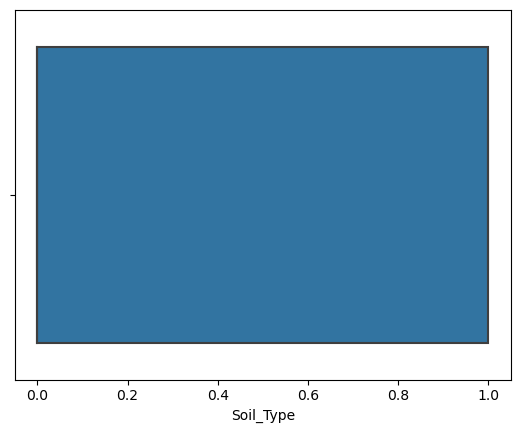

In [27]:
sns.boxplot(data=df_agr,x="Soil_Type")

# Pesticide_Use_Category

<Axes: xlabel='Pesticide_Use_Category'>

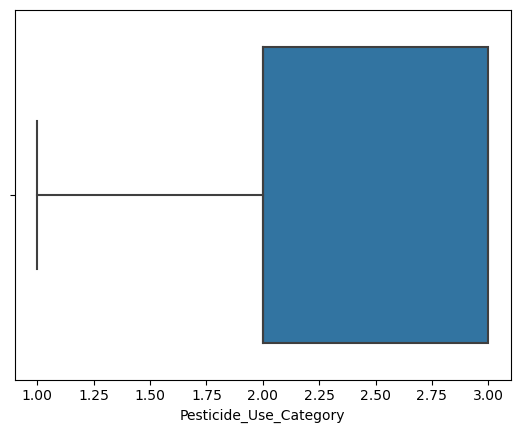

In [28]:
sns.boxplot(data=df_agr,x="Pesticide_Use_Category")

# Number_Doses_Week

<Axes: xlabel='Number_Doses_Week'>

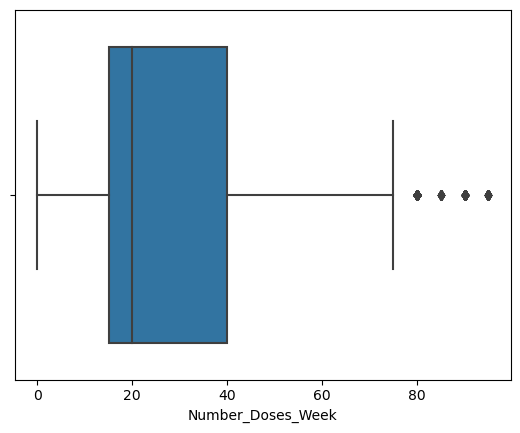

In [29]:
sns.boxplot(data=df_agr,x="Number_Doses_Week")

Here we have some outliers

# Number_Weeks_Used

<Axes: xlabel='Number_Weeks_Used'>

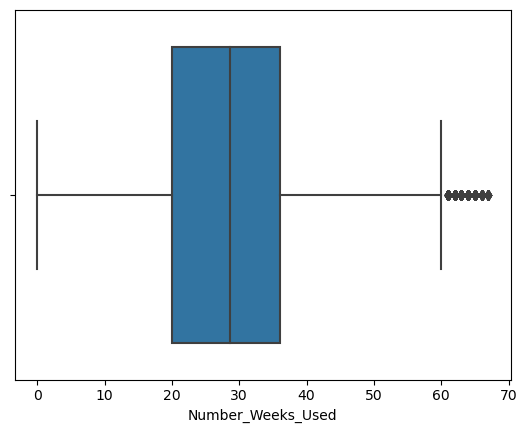

In [30]:
sns.boxplot(data=df_agr,x="Number_Weeks_Used")

here also some outliers are present

# Number_Weeks_Quit

<Axes: xlabel='Number_Weeks_Quit'>

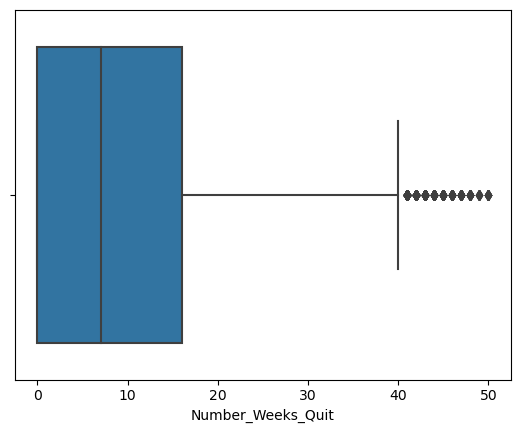

In [31]:
sns.boxplot(data=df_agr,x="Number_Weeks_Quit")

 Here also a lot of outliers are present

# Season  

<Axes: xlabel='Season'>

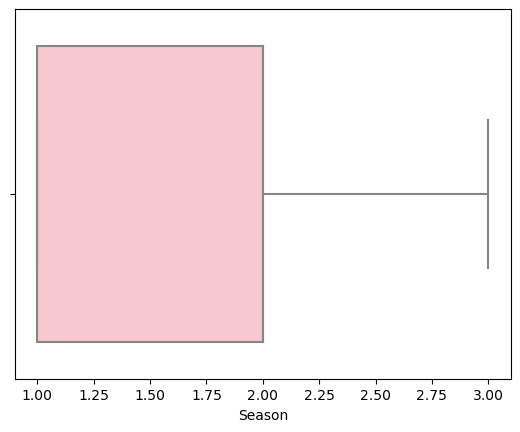

In [32]:
sns.boxplot(data=df_agr,x="Season",color='pink')

Observation

pesticides_used_category and season are negatively correlated

# Univariate analysis

# Estimated_insects_count

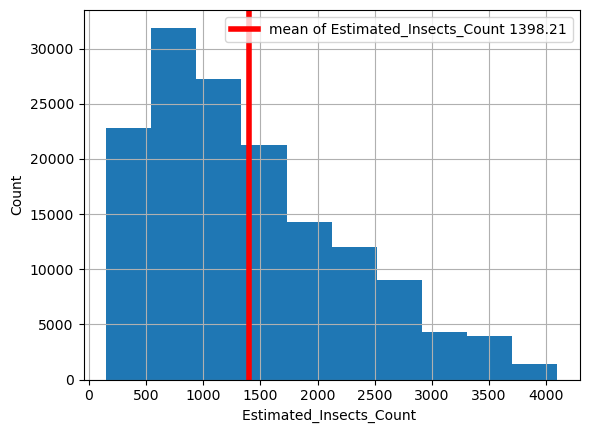

In [33]:
#find the mean of Estimated_Insects_Count using hist plot
df_agr["Estimated_Insects_Count"].hist()
s=df_agr["Estimated_Insects_Count"].mean()
plt.axvline(s,linewidth=4,color="red",label=("mean of Estimated_Insects_Count %0.2f"%s))
plt.xlabel("Estimated_Insects_Count ")
plt.ylabel("Count")
plt.legend()

Observation

The mean of Estimated_insects_count is 1398.21

# Crop_Type  

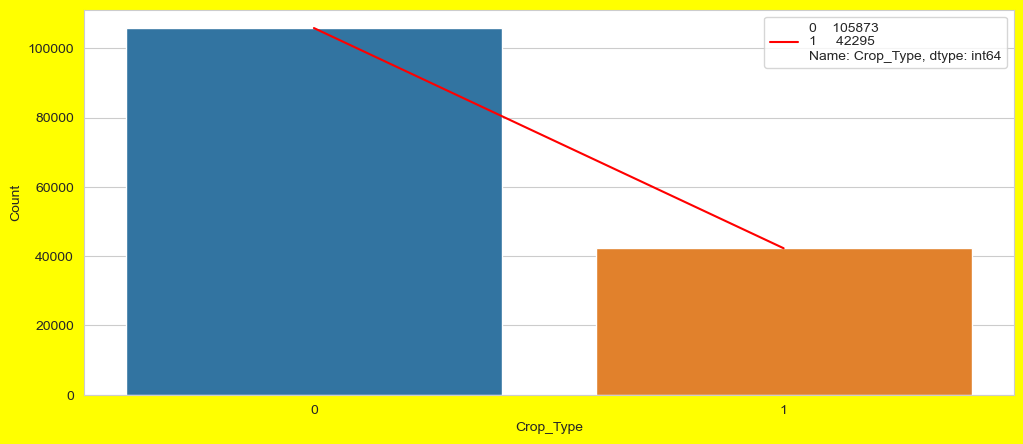

In [34]:
sns.set_style("whitegrid")
plt.figure(figsize=[12,5],facecolor="yellow")
c=df_agr["Crop_Type"].value_counts()
sns.countplot(data=df_agr,x="Crop_Type")
plt.plot(c,color="red",label=c)
plt.xlabel("Crop_Type")
plt.ylabel("Count")
plt.legend()
plt.show()

observation :

Here we observ 0 type crop is more than 100000 and 1 type crop is just little more than 40000

# Soil_Type

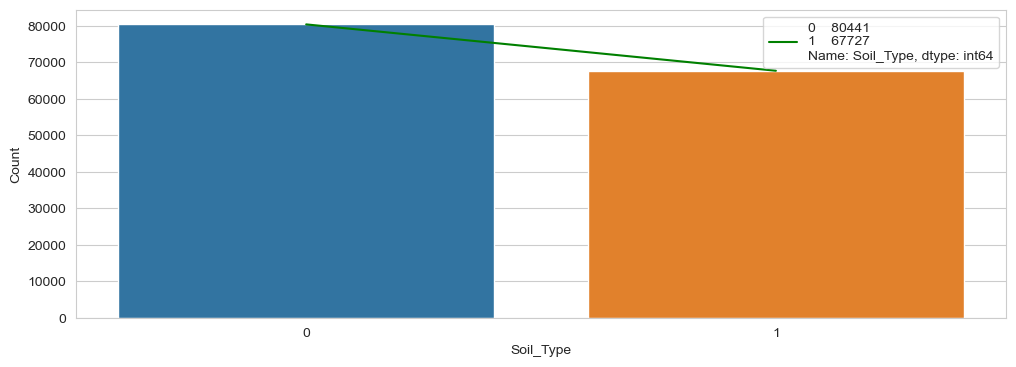

In [35]:
plt.figure(figsize=[12,4])
c=df_agr["Soil_Type"].value_counts()
sns.countplot(data=df_agr,x="Soil_Type")
plt.plot(c,color="green",label=c)
plt.xlabel("Soil_Type")
plt.ylabel("Count")
plt.legend()
plt.show()

Observation

here o type soil have more observation than 1 type

# Pesticide_Use_Category

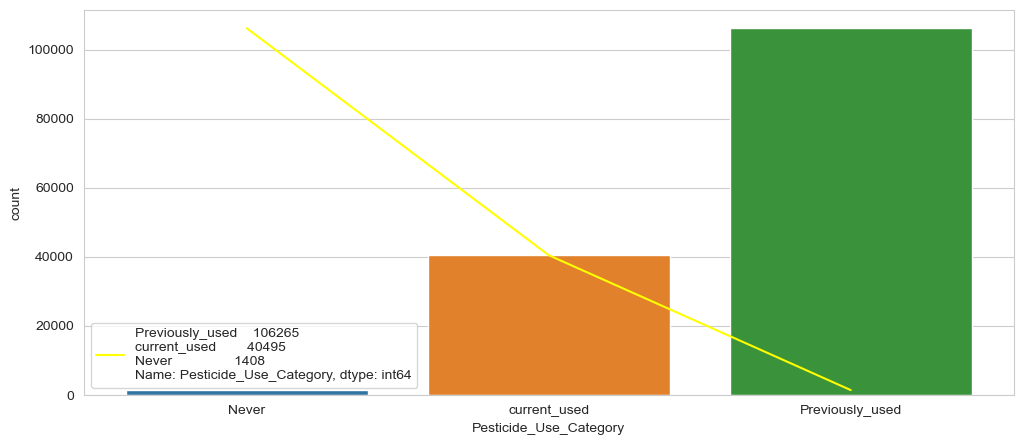

In [36]:
df_agr['Pesticide_Use_Category']=df_agr["Pesticide_Use_Category"].replace({1:"Never",2:"Previously_used",3:"current_used"})
plt.figure(figsize=[12,5])
c=df_agr["Pesticide_Use_Category"].value_counts()
sns.countplot(data=df_agr,x="Pesticide_Use_Category")
plt.plot(c,color="Yellow",label=c)
plt.xlabel("Pesticide_Use_Category")
plt.ylabel("count")
plt.legend()
plt.show()

observation

here we observe more of the pesticides are previously used in the soil

# Number_Doses_Week

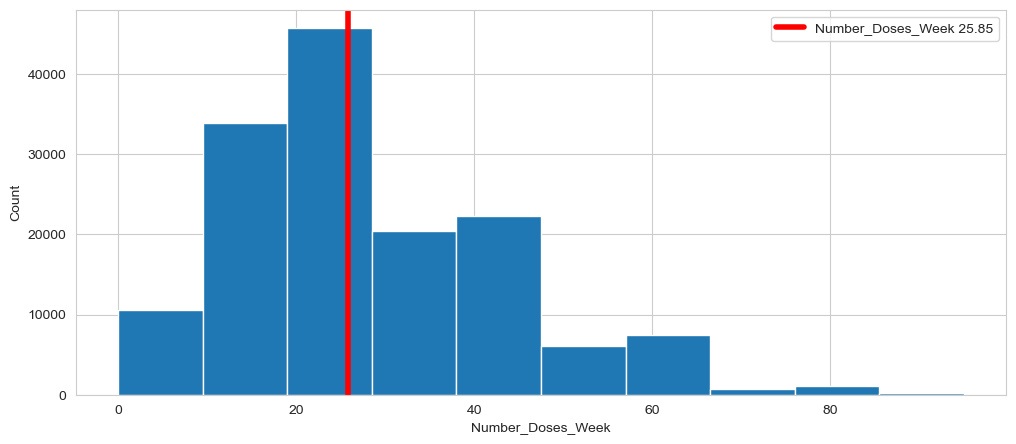

In [37]:
#finding mean of Number_Doses_Week using histplot
plt.figure(figsize=[12,5])
df_agr["Number_Doses_Week"].hist()
c=df_agr["Number_Doses_Week"].mean()
plt.axvline(c,linewidth=4,color="red",label=("Number_Doses_Week %.2f"%c))
plt.xlabel("Number_Doses_Week")
plt.ylabel("Count")
plt.legend()
plt.show()

observation

the mean of Number_Doses_Week is 25.85 ,the average of number of doses per week

# Number_Weeks_Quit 

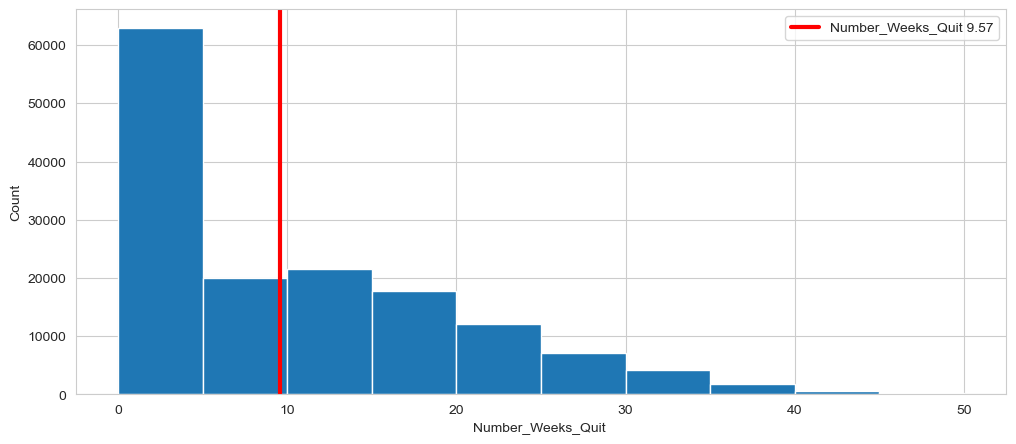

In [38]:
#finding the mean of Number_Weeks_Quit  using the histplot
plt.figure(figsize=[12,5])
df_agr["Number_Weeks_Quit"].hist()
c=df_agr["Number_Weeks_Quit"].mean()
plt.axvline(c,linewidth=3,color="red",label=("Number_Weeks_Quit %0.2f"%c))
plt.xlabel("Number_Weeks_Quit ")
plt.ylabel("Count")
plt.legend()
plt.show()

Observation

The mean of Number_Weeks_Quit is 9.57 but we can see here the number of week quit within 0 to 5 week is much more

# Season

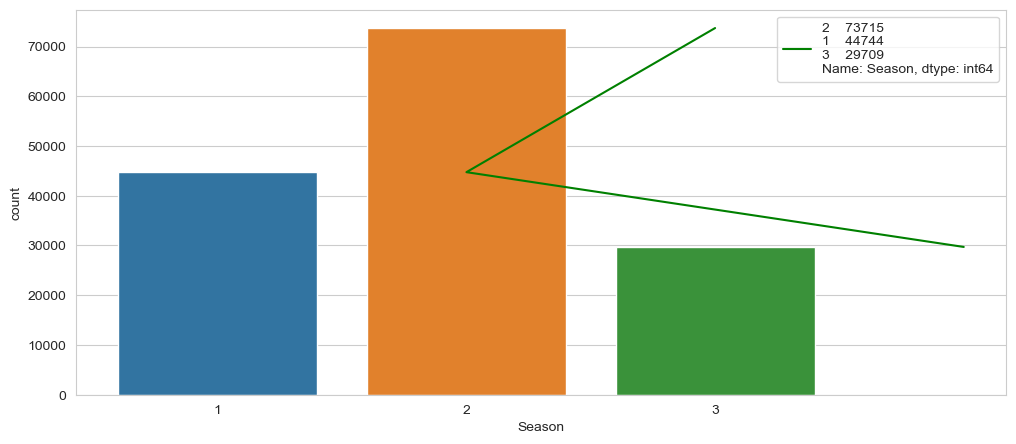

In [39]:
#count the season by countplot
plt.figure(figsize=[12,5])
c=df_agr["Season"].value_counts()
sns.countplot(data=df_agr,x="Season")
plt.plot(c,color="green",label=c)
plt.xlabel("Season")
plt.ylabel("count")
plt.legend()
plt.show()

Here we can wee that most no.of 73715 times crop harvesting in season 2 and 44744 times in season 1,29709 times in season 3

# Crop_Damage

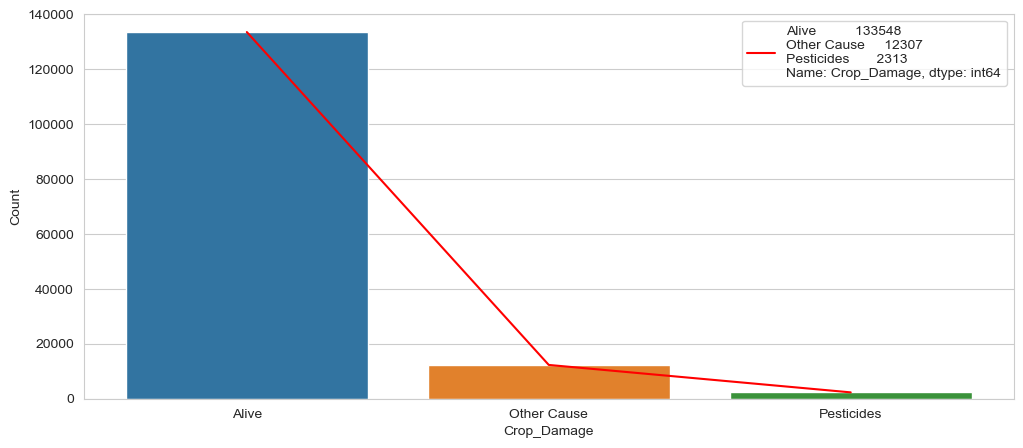

In [40]:
#count the crop damage using countplot
plt.figure(figsize=[12,5])
c=df_agr["Crop_Damage"].value_counts()
sns.countplot(data=df_agr,x="Crop_Damage")
plt.plot(c,color="red",label=c)
plt.xlabel("Crop_Damage")
plt.ylabel("Count")
plt.legend()
plt.show()

Observation

we observe that 133548 no.of crops are alive and 12307 are damage by other cause and 2313 crops are damaged by pesticides

In [41]:
df_agr.columns.value_counts()

ID                         1
Estimated_Insects_Count    1
Crop_Type                  1
Soil_Type                  1
Pesticide_Use_Category     1
Number_Doses_Week          1
Number_Weeks_Used          1
Number_Weeks_Quit          1
Season                     1
Crop_Damage                1
dtype: int64

# Bivariate analysis

# Estimated_insects_count vs Crop_damage

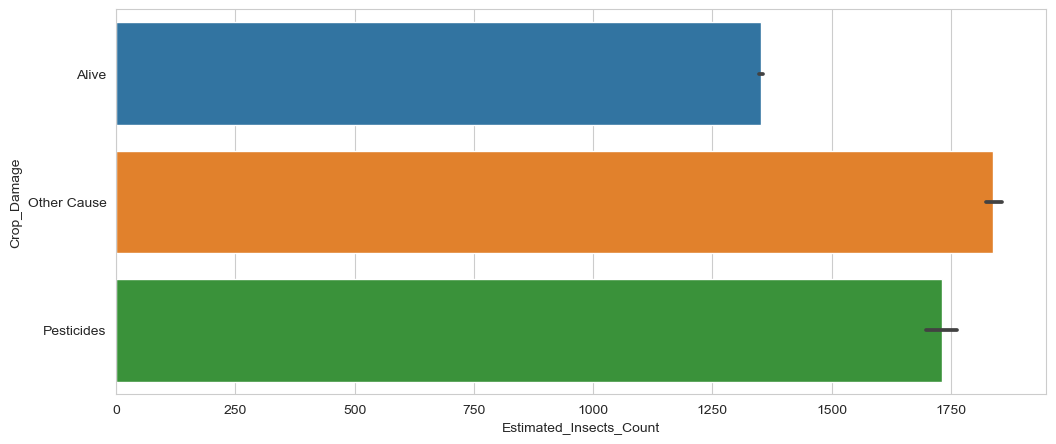

In [42]:
plt.figure(figsize=[12,5])
sns.barplot(data=df_agr,x="Estimated_Insects_Count",y="Crop_Damage")
plt.show()

observation

when estimated_insects_count is 1250 most of the crop are alive but nearly 1750 most of the crop are damaged

# Crop_type vs crop_damage

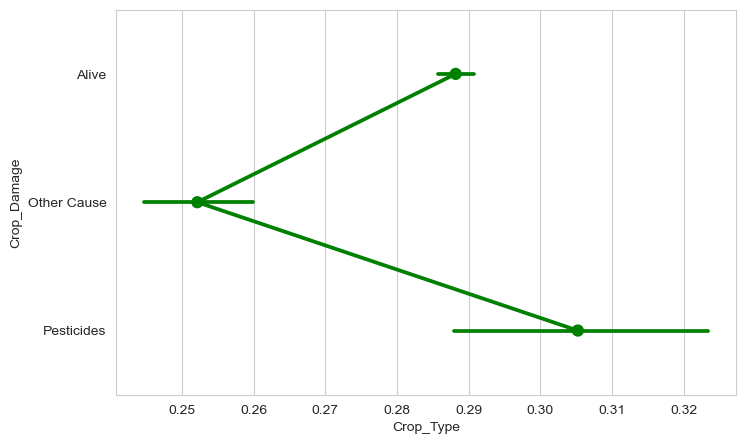

In [43]:
plt.figure(figsize=[8,5])
sns.pointplot(data=df_agr,x="Crop_Type",y="Crop_Damage",color="green")
plt.show()

observation

crop_type between 0.25 and 0.26 are damaged for other cause,between 0.30 and 0.31 are damaged due to Pesticides and between 0.28 and 0.29 are alive crop

# Soil_Type vs Crop_Damage

<Axes: xlabel='Soil_Type', ylabel='Crop_Damage'>

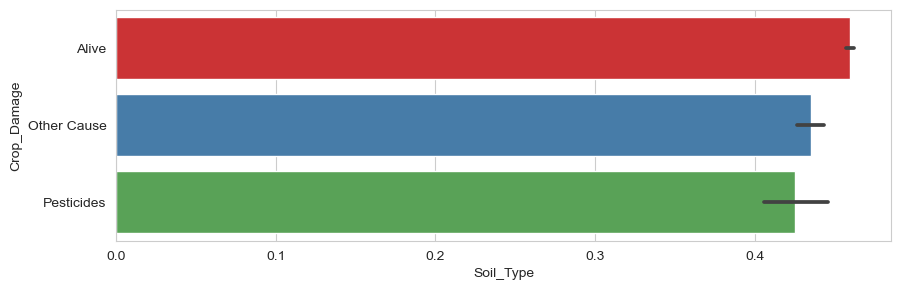

In [44]:
plt.figure(figsize=[10,3])
sns.barplot(data=df_agr,x="Soil_Type",y="Crop_Damage",palette="Set1")

observatio:-when the soil_type is 1 or lessthan 1 most of crop are alive

# Pesticide_Use_Category vs Crop_Damage

<Figure size 800x500 with 0 Axes>

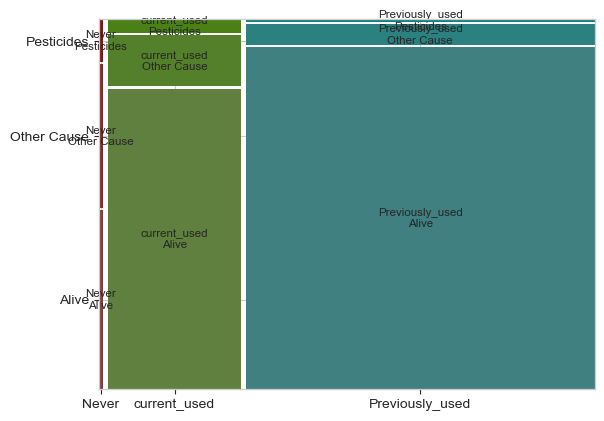

In [45]:
from statsmodels.graphics.mosaicplot import mosaic
plt.figure(figsize=[8,5])
data=df_agr
mosaic(data,["Pesticide_Use_Category","Crop_Damage"],gap=0.01)
plt.show()
               

Obseravtion:-here most of the pesticide are previously used in the soil and in that case most of the crop alive

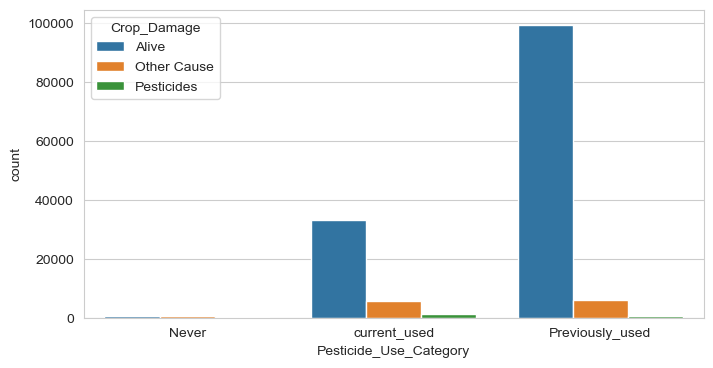

In [46]:
plt.figure(figsize=[8,4])
sns.countplot(data=df_agr,x="Pesticide_Use_Category",hue="Crop_Damage")
plt.show()

most of the crop alive in previously used pesticide Category

# Number_Doses_Week vs Crop_Damage

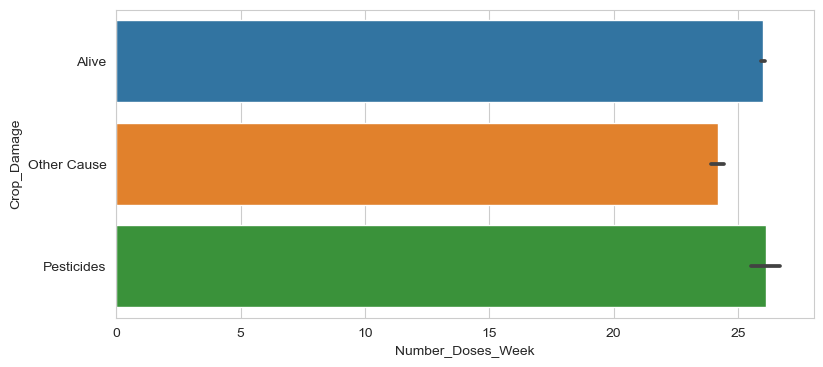

In [47]:
plt.figure(figsize=[9,4])
sns.barplot(data=df_agr,x="Number_Doses_Week",y="Crop_Damage")
plt.show()

Observation:-When no.of doses per week is 27 then amount of crop alive and damage due to pesticides are same but when 24 no.of doses per week most of the crop are damaged due to other cause

# Number_Weeks_Used vs Crop_Damage

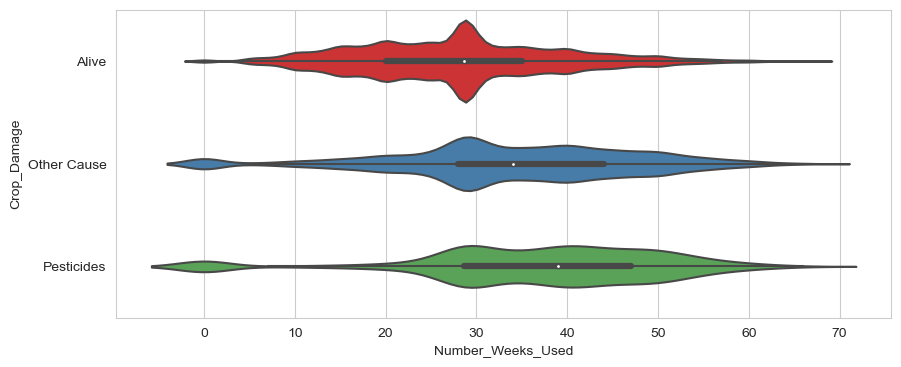

In [48]:
plt.figure(figsize=[10,4])
sns.violinplot(data=df_agr,x="Number_Weeks_Used",y="Crop_Damage",palette="Set1")
plt.show()

Observation:-

when number_of_weeks 29 or less than 29 most of the crop alive

when it more than 29 no.of damaged crop increasing

# Number_Weeks_Quit vs Crop_Damage

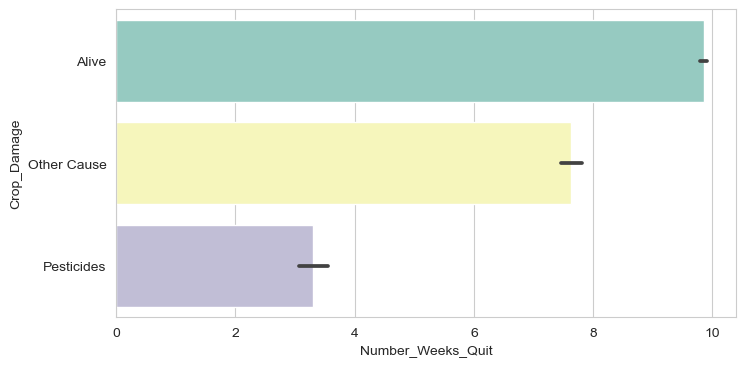

In [49]:
plt.figure(figsize=[8,4])
sns.barplot(data=df_agr,x="Number_Weeks_Quit",y="Crop_Damage",palette="Set3")
plt.show()

Observation:-

when the no.of weeks quit almost or lessthan 10 most of the crop alive

when it comes to less than 8 most of crops ae damaged

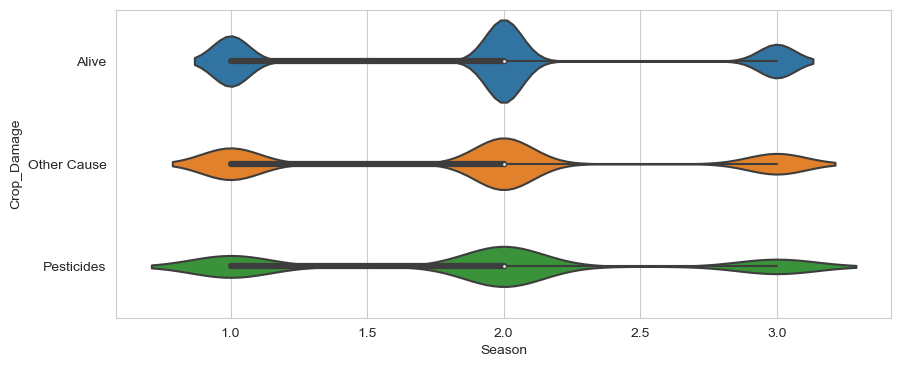

In [50]:
plt.figure(figsize=[10,4])
sns.violinplot(data=df_agr,x="Season",y="Crop_Damage")
plt.show()

Observation:

Here we can observe in season 2 most of the crop alive

# Multivariate analysis

<Figure size 1000x400 with 0 Axes>

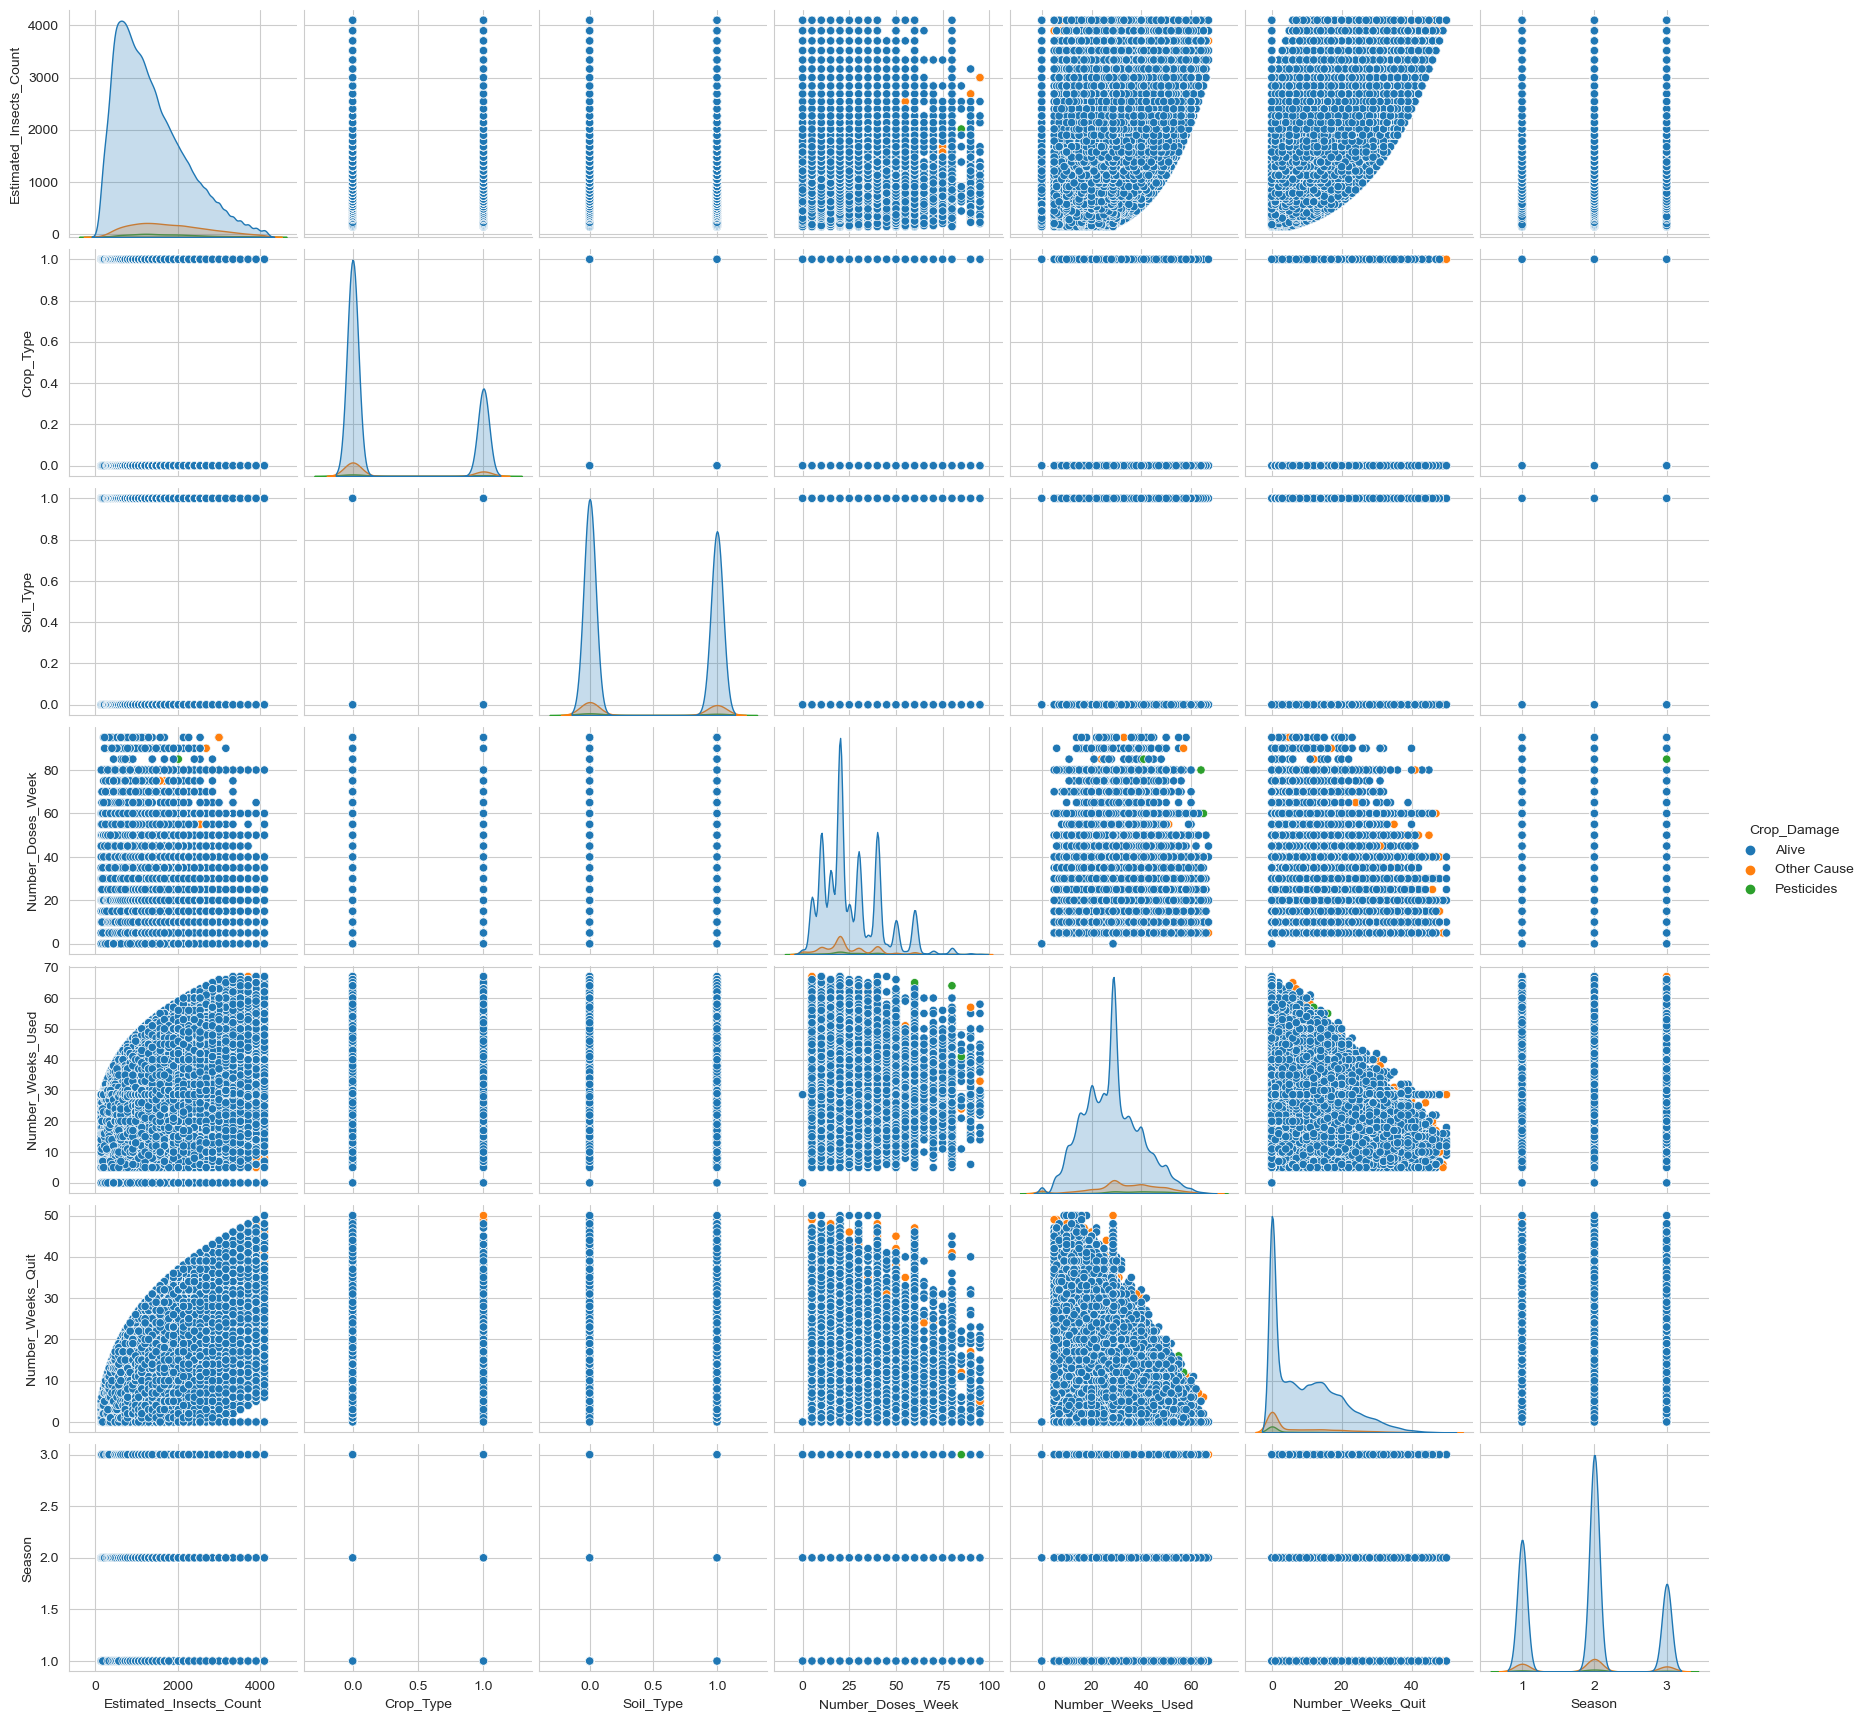

In [51]:
plt.figure(figsize=[10,4])
sns.pairplot(data=df_agr,hue="Crop_Damage")
plt.show()

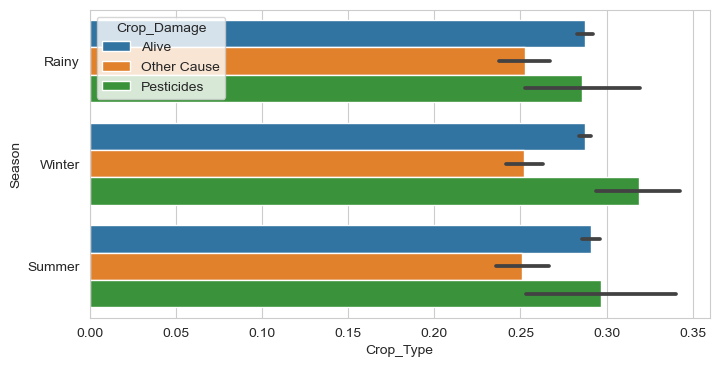

In [52]:
df_agr["Season"]=df_agr["Season"].replace({1:"Rainy",2:"Winter",3:"Summer"})
plt.figure(figsize=(8,4))
sns.barplot(data=df_agr,x='Crop_Type',y='Season', hue='Crop_Damage')
plt.show()

observaion:- In every season most of crop type of 0.19 crop are alive 

In every season 0.25 type crop are damaged by other cause

but in winter season most of crop type 0.32 are damaged by pesticides

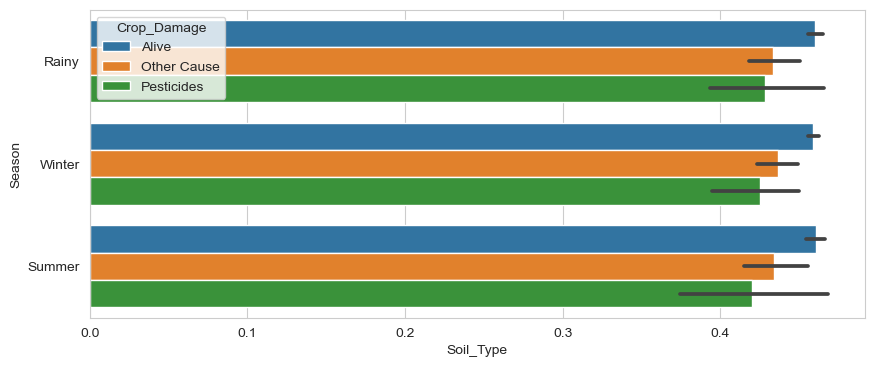

In [53]:
plt.figure(figsize=[10,4])
sns.barplot(data=df_agr,x="Soil_Type",y="Season",hue="Crop_Damage")
plt.show()

Observation

In every season most of crop alive in soil type  0.46

also in all season almost same amount of crop damaged by the cause and pesticides in soil type between 0.41 and 0.43

# Skewness

In [54]:
df_agr.skew()

Estimated_Insects_Count    0.842358
Crop_Type                  0.950111
Soil_Type                  0.172253
Number_Doses_Week          0.949676
Number_Weeks_Used          0.253973
Number_Weeks_Quit          0.896207
dtype: float64

In [55]:
df_agr.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
count,148168.000000,148168.000000,148168.000000,148168.000000,148168.000000,148168.000000
mean,1398.212401,0.285453,0.457096,25.850724,28.656485,9.565324
std,849.197419,0.451631,0.498158,15.525407,11.763780,9.882540
min,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,731.000000,0.000000,0.000000,15.000000,20.000000,0.000000
50%,1212.000000,0.000000,0.000000,20.000000,28.656485,7.000000
75%,1898.000000,1.000000,1.000000,40.000000,36.000000,16.000000
max,4097.000000,1.000000,1.000000,95.000000,67.000000,50.000000


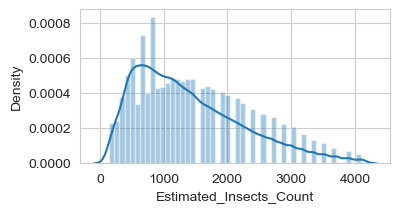

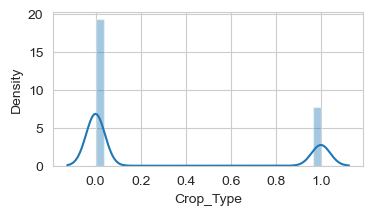

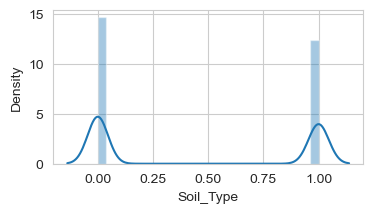

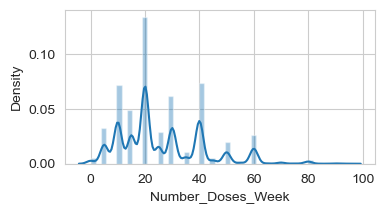

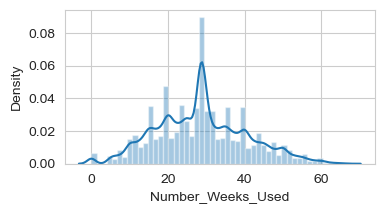

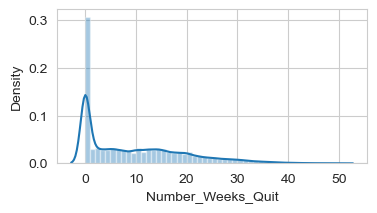

In [56]:
#lets plot distplot for observiing skewness
for i in df_agr.columns:
    if df_agr[i].dtypes!="object":
        plt.figure(figsize=[4,2])
        sns.distplot(df_agr[i])
        plt.show()

Observation:=

In Estimated_insects_count and NUmber_weeks_quit skewed data are there

# DataPreprocessing

In [57]:
#converting the object type to numerici by label encoder
l=LabelEncoder()
c=df_agr.columns
for i in c:
    if df_agr[i].dtypes=="object":
        df_agr[i]=l.fit_transform(df_agr[i])

<IPython.core.display.Javascript object>

In [58]:
df_agr.dtypes

ID                           int32
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int32
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int32
Crop_Damage                  int32
dtype: object

# Outlier

In [59]:
#checking outliers using zscore
from scipy.stats import zscore
z=np.abs(zscore(df_agr))
df_agr_main=df_agr[(z<3).all(axis=1)]
print(df_agr.shape,df_agr_main.shape)

(148168, 10) (143105, 10)


In [60]:
percent_of_outliers=round(((len(df_agr)-len(df_agr_main))/len(df_agr))*100,2)
percent_of_outliers

3.42

In [61]:
#spli input and output variables
df_x=df_agr_main.drop(columns="Crop_Damage",axis=1)
df_y=df_agr_main[["Crop_Damage"]]
print(df_x.shape,df_y.shape)

(143105, 9) (143105, 1)


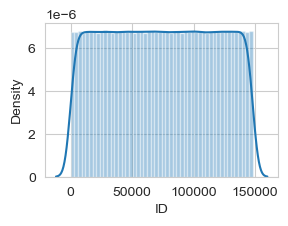

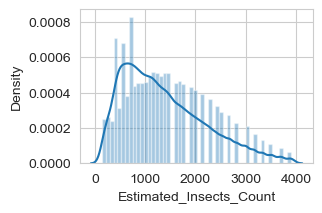

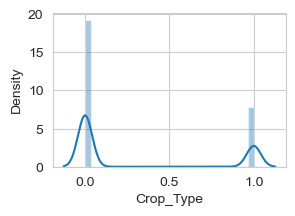

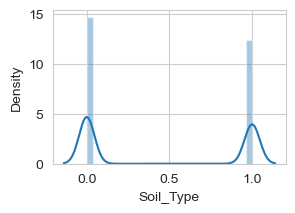

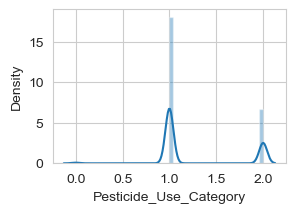

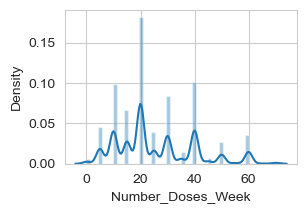

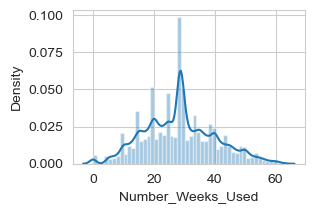

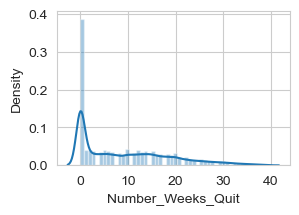

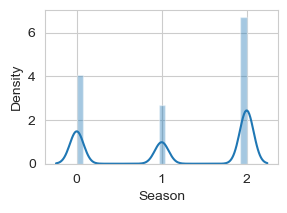

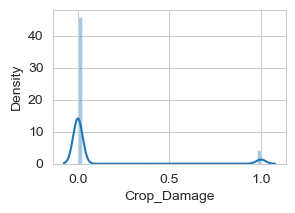

In [62]:
#TEsting  skewness after removing outliers 
for i in df_agr_main.columns:
    if df_agr_main[i].dtypes!="object":
        plt.figure(figsize=[3,2])
        sns.distplot(df_agr_main[i])
        plt.show()

In [63]:
from scipy.stats import skew
skew(df_agr_main)

array([-2.05644041e-04,  8.00798505e-01,  9.33220188e-01,  1.71452164e-01,
        8.22412902e-01,  7.43187650e-01,  2.48202845e-01,  8.06491565e-01,
       -3.88453317e-01,  3.01105088e+00])

In [64]:
# df_agr_main["Estimated_Insects_Count"]=np.sqrt(df_agr_main["Estimated_Insects_Count"])
# skew(df_agr_main["Estimated_Insects_Count"])

In [66]:
for i in df_agr_main.columns:
    if df_agr_main[i].dtypes!="object":
        df_agr_main[i]=np.sqrt(df_agr_main[i])

In [67]:
skew(df_agr_main)

array([-0.56564807,  0.21023454,  0.93322019,  0.17145216, -0.4436963 ,
       -0.04086797, -0.72980344, -0.01650092, -0.67434333,  3.01105088])

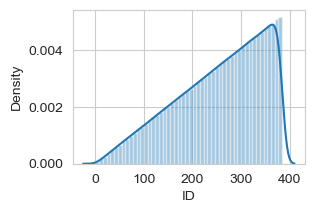

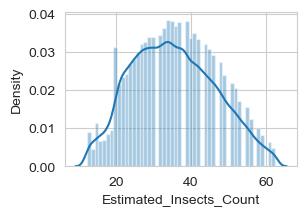

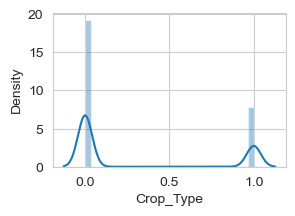

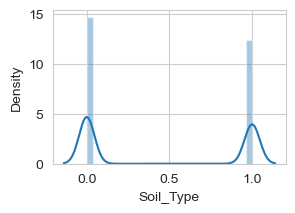

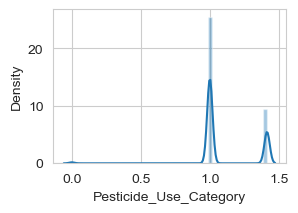

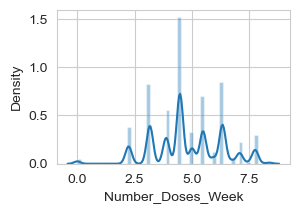

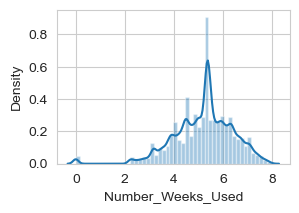

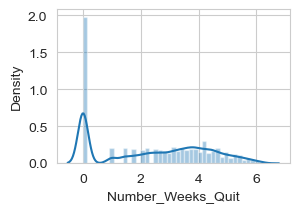

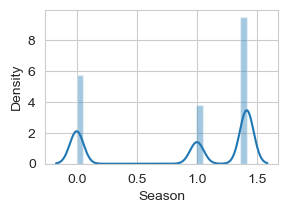

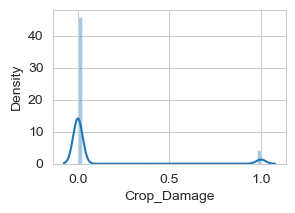

In [71]:
for i in df_agr_main.columns:
    if df_agr_main[i].dtypes!="object":
        plt.figure(figsize=[3,2])
        sns.distplot(df_agr_main[i])
        plt.show()